In [52]:
import numpy as np
import matplotlib.pyplot as plt
data = np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]

/home/robert/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
data[:]

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [6]:
data[3:5, 3:5]

array([[33, 34],
       [43, 44]])

In [8]:
data[0:6:2, 0:6:2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

In [18]:
isPrime = np.ones(100, dtype=bool)
max = int(np.sqrt(len(isPrime)+1))
for i in range(2, max):
    isPrime[2*i::i] = False
print(np.nonzero(isPrime))

(array([ 0,  1,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47,
       53, 59, 61, 67, 71, 73, 79, 83, 89, 97]),)


In [21]:
oneToFour = np.arange(4)
print(oneToFour[[False, True, False, True]])
print(oneToFour[oneToFour%2==0])

[1 3]
[0 2]


In [23]:
data[(1, 2, 3), (1, 2, 3)]

array([11, 22, 33])

In [27]:
data[data[:, 0]%3==0, ::2]
data[:, 0]

array([ 0, 10, 20, 30, 40, 50])

In [29]:
x = np.arange(4)
y = np.arange(4)
x*y

array([0, 1, 4, 9])

In [35]:
ops = 2**(np.arange(4)*3) - np.arange(4)

In [33]:
ops.sum()

579

In [36]:
data = ops + np.arange(len(ops))[:, np.newaxis]

In [37]:
data

array([[  1,   7,  62, 509],
       [  2,   8,  63, 510],
       [  3,   9,  64, 511],
       [  4,  10,  65, 512]])

In [38]:
data.sum()

2340

In [40]:
data.sum(axis=1)

array([579, 583, 587, 591])

In [41]:
data.sum(axis=0)

array([  10,   34,  254, 2042])

In [42]:
!cat /home/robert/data/populations.txt

cat: /home/robert/data/populations.txt: No such file or directory


In [44]:
!pwd

/home/robert/Documents/python/learnML/FastAI


In [45]:
!cat populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


In [46]:
populations = np.loadtxt('populations.txt')

In [50]:
year, hares, lynxs, carrots = populations.T

In [48]:
year

array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920.])

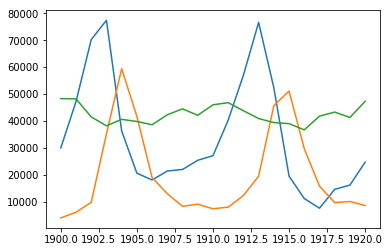

In [53]:
plt.plot(year, hares, year, lynxs, year, carrots)

In [55]:
populations.std(axis=0)

array([6.05530071e+00, 2.08979065e+04, 1.62545915e+04, 3.32250623e+03])

Now, we're going to do some simulations on a random walker.

In [79]:
walks = 2*np.random.randint(0, 2, (100000, 100)) - 1

In [65]:
np.unique(walks)

array([-1,  1])

In [76]:
walks.cumsum(axis=0)

array([[  1,   1,  -1, ...,  -1,  -1,   1],
       [  0,   0,  -2, ...,  -2,  -2,   2],
       [  1,  -1,  -3, ...,  -1,  -1,   1],
       ...,
       [ 18,  14,  -6, ...,  30, -42,   2],
       [ 17,  13,  -5, ...,  29, -43,   3],
       [ 16,  14,  -4, ...,  28, -44,   2]])

In [87]:
results = np.sqrt((walks.cumsum(axis=0)**2).mean(axis=0))

In [73]:
results

array([0.99979998, 1.39871369, 1.81934054, 2.11508865, 2.25308677,
       2.43277619, 2.61044058, 2.80649247, 2.83520722, 3.09812847])

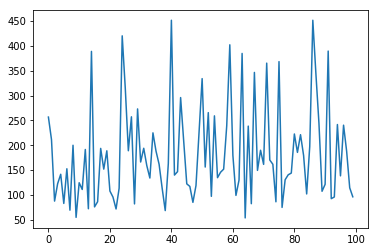

In [88]:
plt.plot(results)